In [1]:
!pip install huggingface_hub 


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from huggingface_hub import login
import dotenv 
import os
dotenv.load_dotenv()
login(token=os.getenv("HF_TOKEN"))

e:\Oldowan Innovations\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [2]:
# Step 1: Install PyTorch with CUDA support for RTX 3050
# Using CUDA 11.8 (most compatible version)

print("🔄 Uninstalling old PyTorch version...")
!pip uninstall -y torch torchvision torchaudio

print("\n📥 Installing PyTorch with CUDA 11.8 support...")
print("   (This may take 2-5 minutes...)")

# Install PyTorch with CUDA 11.8 (most compatible with RTX 3050)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Step 2: Install required libraries for Stable Diffusion
print("\n📥 Installing Stable Diffusion libraries...")
!pip install diffusers transformers accelerate safetensors

print("\n✅ Installation complete!")
print("\n⚠️  IMPORTANT: After installation, please RESTART THE KERNEL")
print("   Then run the next cell to verify CUDA is working.")
print("\n📋 To restart kernel:")
print("   1. Click the 'Restart' button in the notebook toolbar, OR")
print("   2. Press Ctrl+Shift+P and search for 'Notebook: Restart Kernel'")

🔄 Uninstalling old PyTorch version...
Found existing installation: torch 2.9.0
Uninstalling torch-2.9.0:
  Successfully uninstalled torch-2.9.0

📥 Installing PyTorch with CUDA 11.8 support...
   (This may take 2-5 minutes...)
Found existing installation: torch 2.9.0
Uninstalling torch-2.9.0:
  Successfully uninstalled torch-2.9.0

📥 Installing PyTorch with CUDA 11.8 support...
   (This may take 2-5 minutes...)


You can safely remove it manually.


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp313-cp313-win_amd64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp313-cp313-win_amd64.whl.metadata (6.8 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp313-cp313-win_amd64.whl (2817.2 MB)
Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp313-cp313-win_amd64.whl (5.5 MB)
Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp313-cp313-win_amd64.whl (4.1 MB)

📥 Installing Stable Diffusion libraries...



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



✅ Installation complete!

⚠️  IMPORTANT: After installation, please RESTART THE KERNEL
   Then run the next cell to verify CUDA is working.

📋 To restart kernel:
   1. Click the 'Restart' button in the notebook toolbar, OR
   2. Press Ctrl+Shift+P and search for 'Notebook: Restart Kernel'



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Quick GPU Detection Test - Run this to verify CUDA installation
import torch

print("=" * 60)
print("🔍 GPU DETECTION TEST")
print("=" * 60)

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check CUDA availability
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    
    for i in range(torch.cuda.device_count()):
        print(f"\n📊 GPU {i} Information:")
        print(f"   Name: {torch.cuda.get_device_name(i)}")
        print(f"   Total VRAM: {torch.cuda.get_device_properties(i).total_memory / 1024**3:.2f} GB")
        print(f"   Compute Capability: {torch.cuda.get_device_capability(i)}")
    
    print("\n✅ Your GPU is ready for image generation!")
else:
    print("\n❌ CUDA not detected!")
    print("\nPossible reasons:")
    print("1. ⚠️  You haven't run cell 3 yet (CUDA installation)")
    print("2. ⚠️  NVIDIA GPU drivers not installed")
    print("3. ⚠️  GPU not recognized by Windows")
    print("\n💡 Solutions:")
    print("   • Run cell 3 to install PyTorch with CUDA support")
    print("   • Update NVIDIA drivers from nvidia.com/drivers")
    print("   • Restart your notebook kernel after installation")

print("=" * 60)

🔍 GPU DETECTION TEST
PyTorch version: 2.7.1+cu118
CUDA available: True
CUDA version: 11.8
Number of GPUs: 1

📊 GPU 0 Information:
   Name: NVIDIA GeForce RTX 3050 Laptop GPU
   Total VRAM: 4.00 GB
   Compute Capability: (8, 6)

✅ Your GPU is ready for image generation!


e:\Oldowan Innovations\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
✅ GPU detected: NVIDIA GeForce RTX 3050 Laptop GPU
✅ VRAM available: 4.00 GB
✅ Running on GPU - Image generation will be fast!

📥 Loading Stable Diffusion model...
   (This will download ~4GB on first run)


Loading pipeline components...:  50%|█████     | 3/6 [00:01<00:01,  2.93it/s]`torch_dtype` is deprecated! Use `dtype` instead!
`torch_dtype` is deprecated! Use `dtype` instead!
Loading pipeline components...: 100%|██████████| 6/6 [00:08<00:00,  1.49s/it]

Token indices sequence length is longer than the specified maximum sequence length for this model (81 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', realistic texture .']
Token indices sequence length is longer than the specified maximum sequence length for this model (81 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', realistic texture .']


🔧 Enabling memory optimizations for 4GB VRAM...
✅ Model loaded successfully with optimizations!

🎨 Generating image...
   Prompt: 'Close-up, overhead full shot of finely chopped white onion and minced garlic being added to a hot, n...'

⏳ Generating (should take 10-30 seconds on RTX 3050)...


100%|██████████| 30/30 [00:14<00:00,  2.11it/s]




✅ Image generated and saved as cooking_scene.png!
📊 Resolution: 512x512 (optimized for 4GB VRAM)


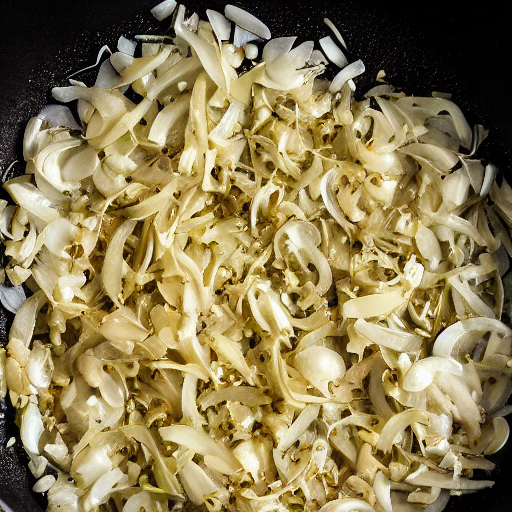

In [2]:
# Optimized for RTX 3050 4GB VRAM

import torch
from diffusers import StableDiffusionPipeline
import gc

# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

if torch.cuda.is_available():
    print(f"✅ GPU detected: {torch.cuda.get_device_name(0)}")
    print(f"✅ VRAM available: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    print("✅ Running on GPU - Image generation will be fast!")
else:
    print("⚠️  No CUDA detected - make sure you ran the installation cell above!")
    print("⚠️  Running on CPU - Image generation will be SLOW")

# Use float16 for better performance and lower VRAM usage
dtype = torch.float16 if device == "cuda" else torch.float32

# 1. Load the pre-trained Stable Diffusion model
print("\n📥 Loading Stable Diffusion model...")
print("   (This will download ~4GB on first run)")
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=dtype,
    safety_checker=None,  # Disabled to save VRAM
    requires_safety_checker=False
)

# 2. Move to device with memory optimizations for 4GB VRAM
pipe = pipe.to(device)

# Enable memory optimizations for low VRAM
if device == "cuda":
    print("🔧 Enabling memory optimizations for 4GB VRAM...")
    pipe.enable_attention_slicing()  # Reduces VRAM usage
    pipe.enable_vae_slicing()        # Further reduces VRAM usage
    
print("✅ Model loaded successfully with optimizations!")

# 3. Define your text prompt
prompt = "Close-up, overhead full shot of finely chopped white onion and minced garlic being added to a hot, non-stick sauté pan with a shimmer of olive oil. The pan is on a gas stovetop, with a soft, warm glow from the flame. Crisp, professional food photography, shallow depth of field, natural kitchen light, vibrant colors, highly detailed, realistic texture."

# 4. Generate the image
print(f"\n🎨 Generating image...")
print(f"   Prompt: '{prompt[:100]}...'")
print(f"\n⏳ Generating (should take 10-30 seconds on RTX 3050)...")

# Generate with optimized settings for 4GB VRAM
with torch.inference_mode():  # Save memory during inference
    image = pipe(
        prompt, 
        num_inference_steps=30,  # Good balance of quality and speed
        guidance_scale=7.5,       # Standard setting
        height=512,               # Smaller size to fit in 4GB VRAM
        width=512
    ).images[0]

# Clear VRAM
if device == "cuda":
    torch.cuda.empty_cache()
    gc.collect()

# 5. Save the image to a file
output_filename = "cooking_scene.png"
image.save(output_filename)

print(f"\n✅ Image generated and saved as {output_filename}!")
print(f"📊 Resolution: 512x512 (optimized for 4GB VRAM)")

# Display the image in the notebook
from IPython.display import display
display(image)